<a href="https://colab.research.google.com/github/FilippMaksimov/Net.FeaturesAndModels/blob/main/PolinomRegression_Maksimov_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Задание 1

In [ ]:
#Функция генерации выборок
def x_data(l, k):
  df = []
  for i in range(l):
    var = (4 * ((i-k)/(l-1))) - 2
    df.append(var)
  return df

In [ ]:
#Обучающая выборка
x_train = x_data(50, 1)
#Тестовая выборка
x_test= x_data(50, 0.5)

In [ ]:
def y_data(x):
  df = []
  for i in x:
    var = 1 / (1+25*(i**2))
    df.append(var)
  return df

In [ ]:
y_train = y_data(x_train)
y_test = y_data(x_test)
print(x_train)
print('-----------------------------------------------------------------------')
print(y_train)
print('------------------')
print('------------------')
print(x_test)
print('------------------')
print(y_test)

[-2.0816326530612246, -2.0, -1.9183673469387754, -1.836734693877551, -1.7551020408163265, -1.6734693877551021, -1.5918367346938775, -1.510204081632653, -1.4285714285714286, -1.3469387755102042, -1.2653061224489797, -1.183673469387755, -1.1020408163265305, -1.0204081632653061, -0.9387755102040816, -0.8571428571428572, -0.7755102040816326, -0.6938775510204083, -0.6122448979591837, -0.5306122448979591, -0.44897959183673475, -0.36734693877551017, -0.2857142857142858, -0.20408163265306123, -0.12244897959183665, -0.04081632653061229, 0.04081632653061229, 0.12244897959183687, 0.204081632653061, 0.2857142857142856, 0.36734693877551017, 0.44897959183673475, 0.5306122448979593, 0.6122448979591835, 0.693877551020408, 0.7755102040816326, 0.8571428571428572, 0.9387755102040818, 1.020408163265306, 1.1020408163265305, 1.183673469387755, 1.2653061224489797, 1.3469387755102042, 1.4285714285714284, 1.510204081632653, 1.5918367346938775, 1.6734693877551021, 1.7551020408163267, 1.8367346938775508, 1.91836

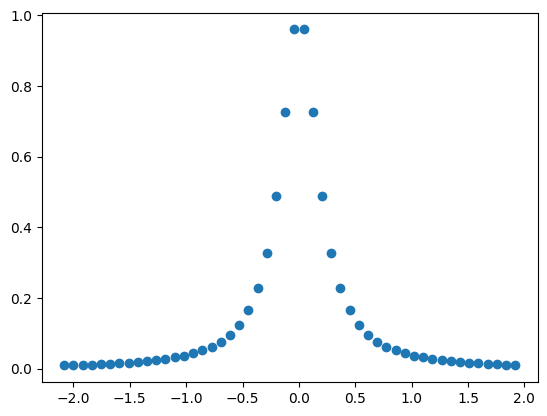

In [ ]:
plt.scatter(x_train, y_train)

In [ ]:
def polinomial_regression(x_train, y_train, x_test, n=1):
  mat = []
  v = []
  #номер строки
  r = 0
  #номер столбца
  c = 0
  for i in range((n+1)*(n+1)):
    sum_el = 0
    for x_i in x_train:
      #Вычисление значений элементов матрицы
      el = (x_i**(r+c))
      sum_el = sum_el + el
    c = c + 1
    if c == (n + 1):
      c = 0
      r = r + 1
    mat.append(sum_el)

  r= 0
  for i in range(n+1):
    sum_el = 0
    for j in range(len(x_train)):
      #Вычисление значений элементов вектора
      el = (x_train[j]**(r))*(y_train[j])
      sum_el = sum_el + el
    v.append(sum_el)
    r = r + 1

  mat = np.array(mat)
  v = np.array(v)
  mat = mat.reshape(n+1,n+1)

  #Поиск коэффициентов регрессии путем решения системы линейных уравнений методом Гаусса
  coeff = np.linalg.solve(mat, v)
  #Поиск значений по x_test (обучение)
  y_pred = []
  for x_t_i in x_test:
    sum_el = 0
    for k in range(len(coeff)):
      el = (x_t_i**(k))*coeff[k]
      sum_el = sum_el + el
    y_pred.append(sum_el)
  return coeff, y_pred

In [ ]:
print(polinomial_regression(x_train, y_train, x_test, 10)[0])

[ 0.67382788 -0.0637493  -2.54724872  0.26733154  3.27762239 -0.29150039
 -1.80965369  0.11454159  0.44595074 -0.01469497 -0.04039106]


Text(0, 0.5, '1/(1+25x^2)')

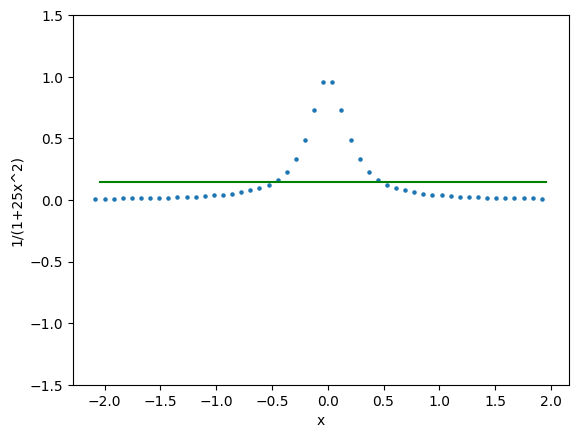

In [ ]:
#Степень полинома n = 0
y_pred = polinomial_regression(x_train,y_train, x_test, 0)[1]
plt.scatter(x_train, y_train, s=5)
plt.plot(x_test, y_pred, color="green")
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.ylabel('1/(1+25x^2)')

Text(0, 0.5, '1/(1+25x^2)')

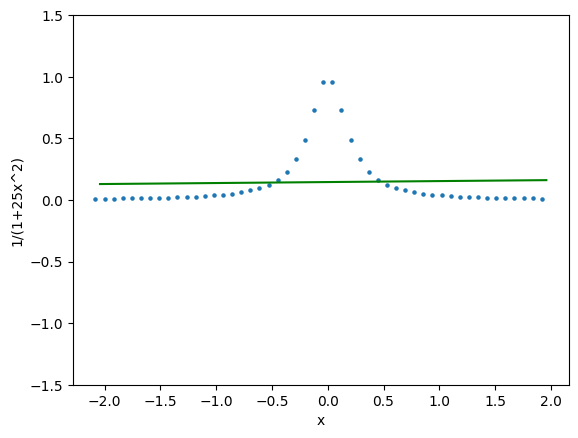

In [ ]:
#Степень полинома n = 1
y_pred = polinomial_regression(x_train,y_train, x_test, 1)[1]
plt.scatter(x_train, y_train, s=5)
plt.plot(x_test, y_pred, color="green")
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.ylabel('1/(1+25x^2)')

Text(0, 0.5, '1/(1+25x^2)')

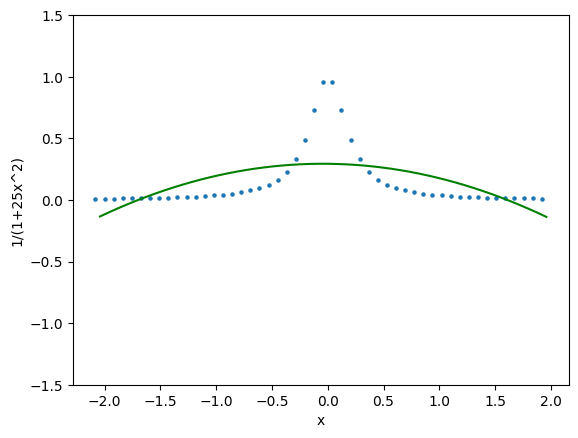

In [ ]:
#Степень полинома n = 2
y_pred = polinomial_regression(x_train,y_train, x_test, 2)[1]
plt.scatter(x_train, y_train, s=5)
plt.plot(x_test, y_pred, color="green")
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.ylabel('1/(1+25x^2)')

Text(0, 0.5, '1/(1+25x^2)')

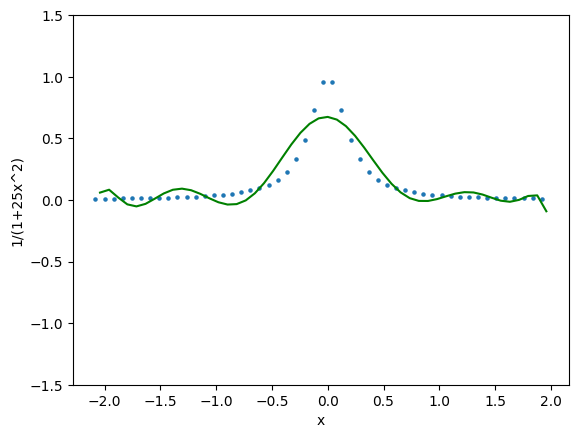

In [ ]:
#Степень полинома n = 10
y_pred = polinomial_regression(x_train,y_train, x_test, 10)[1]
plt.scatter(x_train, y_train, s=5)
plt.plot(x_test, y_pred, color="green")
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.ylabel('1/(1+25x^2)')

Text(0, 0.5, '1/(1+25x^2)')

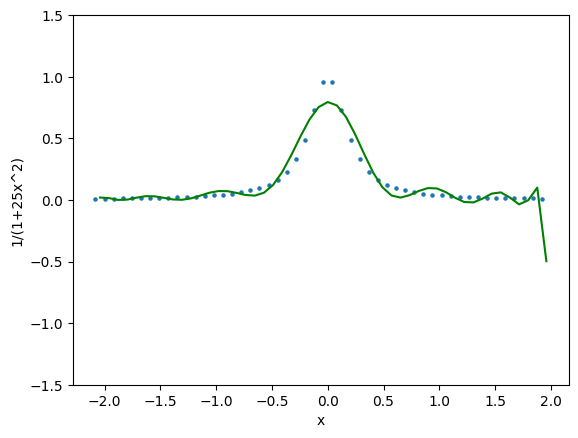

In [ ]:
#Степень полинома n = 15
y_pred = polinomial_regression(x_train,y_train, x_test, 15)[1]
plt.scatter(x_train, y_train, s=5)
plt.plot(x_test, y_pred, color="green")
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.ylabel('1/(1+25x^2)')

Text(0, 0.5, '1/(1+25x^2)')

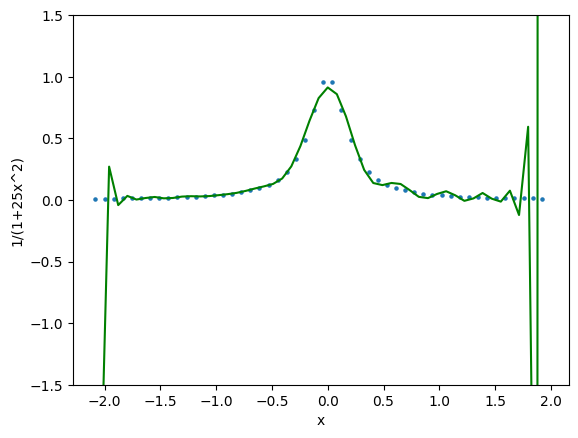

In [ ]:
#Степень полинома n = 40
y_pred = polinomial_regression(x_train,y_train, x_test, 40)[1]
plt.scatter(x_train, y_train, s=5)
plt.plot(x_test, y_pred, color="green")
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.ylabel('1/(1+25x^2)')

Text(0, 0.5, '1/(1+25x^2)')

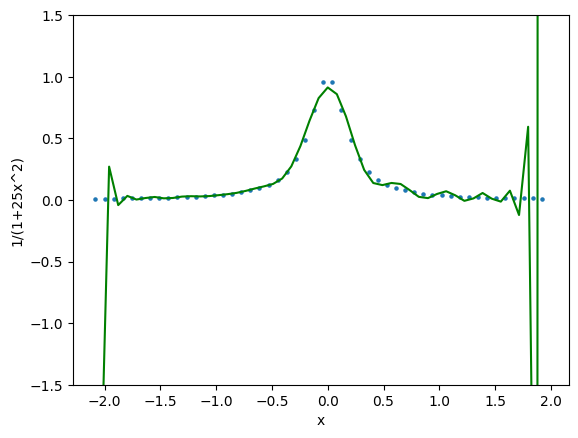

In [ ]:
#Степень полинома n = 50
y_pred = polinomial_regression(x_train,y_train, x_test, 40)[1]
plt.scatter(x_train, y_train, s=5)
plt.plot(x_test, y_pred, color="green")
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.ylabel('1/(1+25x^2)')

Задание 2

In [ ]:
df = pd.read_csv('Housing.csv')
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [ ]:
#Кодирование категоральных данных
df.iloc[:, 6:13] = pd.get_dummies(df.iloc[:, 6:13], drop_first=True).astype(np.int8)

In [ ]:
#Функция разбития на обучающую и тестовую выборки
def train_test_split(x, y, test_size):
  if len(x) != len(y):
        raise ValueError("Количество элементов в X и Y должно совпадать.")
    # Случайная индексация
  idx = np.arange(len(x))
  np.random.shuffle(idx)
  # вычисление размера тестовой выборки
  test_size = int(len(x) * test_size)
  train_indices = idx[:-test_size]  # индексы для обучающей выборки
  test_indices = idx[-test_size:]    # индексы для тестовой выборки
  # Разделение на обучающую и тестовую выборки
  x_train = x.iloc[train_indices]
  y_train = y.iloc[train_indices]
  x_test = x.iloc[test_indices]
  y_test = y.iloc[test_indices]

  return x_train.values.tolist(), x_test.values.tolist(), y_train.values.tolist(), y_test.values.tolist()

In [ ]:
x = df.iloc[:, 2:13]
y = df.iloc[:, 1]
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, 0.3)

In [ ]:
def linear_regression(x_train, y_train, x_test):
  mat = []
  v = []
  lam1 = 0
  lam2 = 0
  #номер строки
  r = 0
  #номер столбца
  c = 0
  for i in range((len(x_train[0])+1)*(len(x_train[0])+1)):
    sum_el = 0
    for x_i in x_train:
      if r == 0:
        lam1 = 1
      else:
        lam1 = x_i[r-1]
      if c == 0:
        lam2 = 1
      else:
        lam2 = x_i[c-1]
      el = lam1 * lam2
      sum_el = sum_el + el
    c = c + 1
    if c == (len(x_train[0])+1):
      c = 0
      r = r + 1
    mat.append(sum_el)

  r= 0
  for i in range(len(x_train[0])+1):
    sum_el = 0
    k = 0
    for x_i in x_train:
      #Вычисление значений элементов вектора
      if r == 0:
        lam1 = 1
      else:
        lam1 = x_i[r-1]
      el = lam1*(y_train[k])
      sum_el = sum_el + el
      k = k + 1
    v.append(sum_el)
    r = r + 1

  mat = np.array(mat)
  v = np.array(v)
  mat = mat.reshape(len(x_train[0])+1, len(x_train[0])+1)

  #Поиск коэффициентов регрессии путем решения системы линейных уравнений методом Гаусса
  coeff = list(np.linalg.solve(mat, v))
  coeff.remove(coeff[0])
  #Поиск значений по x_test (обучение)
  y_pred = []
  for x in x_test:
    sum_el = coeff[0]
    for k in range(0, len(coeff)):
      el = x[k]*coeff[k]
      sum_el = sum_el + el
    y_pred.append(round(sum_el, 1))
  return coeff, y_pred

In [ ]:
coeff = linear_regression(x_train_2, y_train_2, x_test_2)[0]
coeff

[3.603471095600102,
 1833.3563163574465,
 13968.937101112228,
 6818.518942052699,
 4253.051862874943,
 5793.72399750151,
 4197.773756869489,
 5899.666105150631,
 11393.487294207884,
 11359.574349382357,
 11127.608527869712]

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train_2, y_train_2)

In [ ]:
model.coef_

array([3.60347110e+00, 1.83335632e+03, 1.39689371e+04, 6.81851894e+03,
       4.25305186e+03, 5.79372400e+03, 4.19777376e+03, 5.89966611e+03,
       1.13934873e+04, 1.13595743e+04, 1.11276085e+04])